### Problem Statement :
X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%.

### Business Goal :
X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company needs a model wherein you need to assigned Lead Score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Methodology :

- Dataset Reading & Cleaning as per requirement
- EDA Analysis
- Logistic Regression Model Build up
- Model Performance Checking By Accuracy, Sensitivity, Specificity, FPR ect.
- Lead Score Assignment to each Leads & Conversion Rate checking
- Model Evaluation & Compare

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading Dataset

pd.options.display.max_columns = 50
lead_data = pd.read_csv(r'D:\Download folder\Logistic Regression Case Study\Lead+Scoring+Case+Study\Lead Scoring assignment\Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Checking Null Percentage
round(100*(lead_data.isna().sum()/len(lead_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [6]:
# Converting all "Select" to NAN value
lead_data = lead_data.replace('Select', np.nan)

In [7]:
# After conversion checking Null Percentage
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Now we are going to drop some columns which have null percentage more than 40% and also we will drop column **Tags**. because **This column basically created by the Sales Team after having a contact with customers. But our case study is to mainly identify those Leads which are very much probable for conversion and to be contacted on priority basis**. Thats why we have decided to drop this column otherwise this column make our entire analysis biased.

In [8]:
# Dropping some columns
del_col = ['How did you hear about X Education','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index',
          'Asymmetrique Activity Score','Asymmetrique Profile Score']
lead_data = lead_data.drop(columns=del_col, axis=1)

In [9]:
lead_data.shape

(9240, 29)

In [10]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [11]:
lead_data.City.value_counts(dropna = False, normalize=True)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

More than 70% data belongs to for one city and Null value. So clearly this variable has no use for our analysis.

In [12]:
# dropping City column 
lead_data = lead_data.drop('City',axis=1)

In [13]:
lead_data.Specialization.value_counts(dropna=False, normalize=True)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [14]:
# Replacing Null value with Other-Specialization

lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others-Specialization')

In [15]:
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False, normalize=True)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

70% Data belongs for one reason and more than 29% have null value. So no use for analysis. Better to drop it.

In [16]:
lead_data = lead_data.drop('What matters most to you in choosing a course',1)

In [17]:
lead_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [18]:
# Replacing Null Value with No_Information
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan, 'No_Information')

In [19]:
# Replacing Null Value with India
lead_data['Country'] = lead_data['Country'].replace(np.nan, 'India')

In [20]:
# Once again checking Null Percentage
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

In [21]:
lead_data.dropna(inplace=True)

In [22]:
# Final Checking for Null Percentage
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [23]:
# checking Conversion Percentage for Converted Column

sum(lead_data['Converted']/len(lead_data['Converted'].index)*100)

37.85541106457961

In [24]:
# Data Retained after cleaning

print(len(lead_data.index)/9240)

0.982034632034632


## EDA Analysis

#### Lead Origin

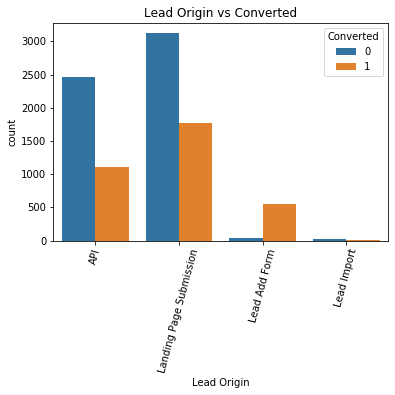

In [25]:
sns.countplot(x='Lead Origin', hue='Converted', data= lead_data)
plt.title('Lead Origin vs Converted')
plt.xticks(rotation=75)
plt.show()

#### Inference
API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable. Lead Add Form has more than 90% conversion rate but count of lead are not very high. Lead Import are very less in count. To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

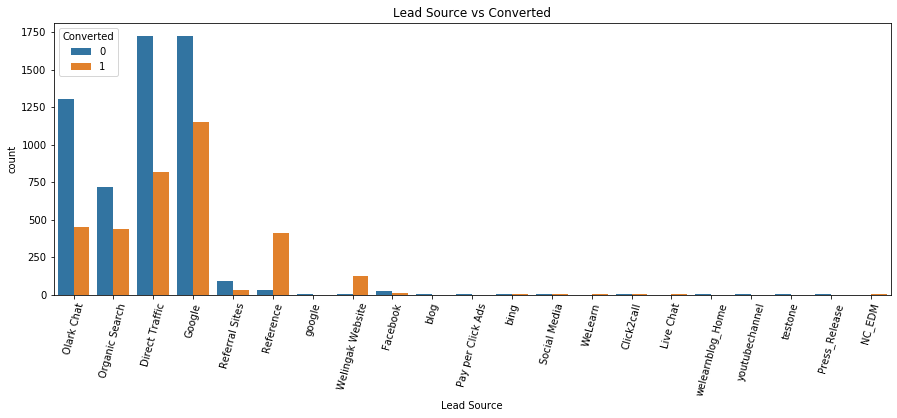

In [26]:
# Plot for Lead Source

plt.figure(figsize=(15,5))
sns.countplot(x='Lead Source', hue='Converted', data= lead_data)
plt.title('Lead Source vs Converted')
plt.xticks(rotation=75)
plt.show()

In [27]:
# Grouping some features to "Others" which are very low in value for better understanding

lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

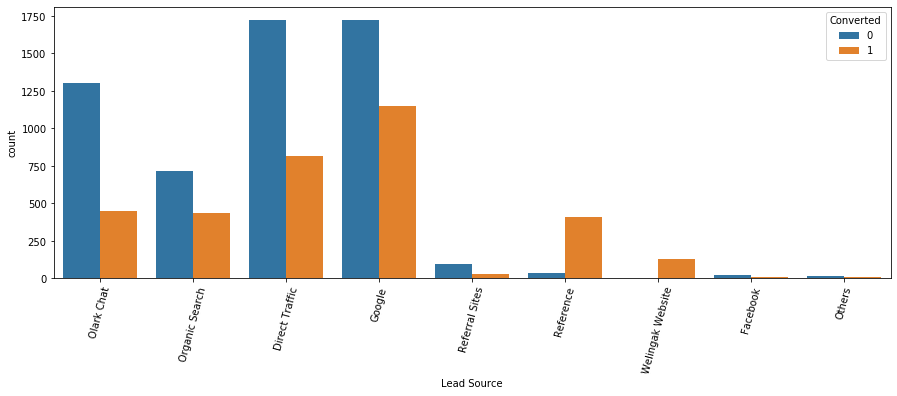

In [28]:
# Plot after grouping

plt.figure(figsize=(15,5))
sns.countplot(x='Lead Source', hue='Converted', data= lead_data)
plt.xticks(rotation=75)
plt.show()

#### Inference
Google and Direct traffic generates maximum number of leads. Conversion Rate of reference leads and leads through welingak website is high. To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website

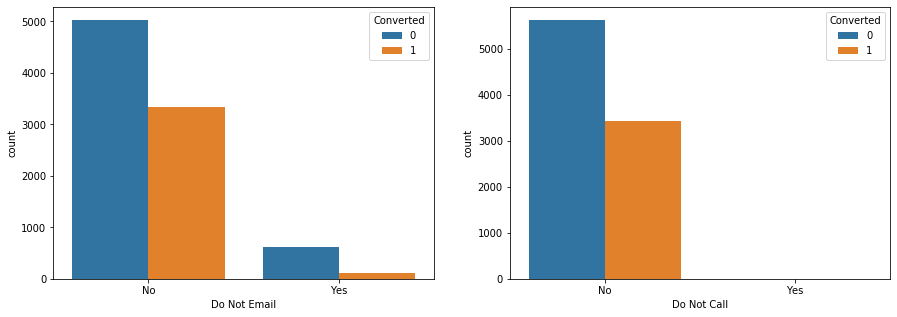

In [29]:
# Plot

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_data)
plt.xticks(rotation=0)

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead_data)
plt.xticks(rotation=0)
plt.show()

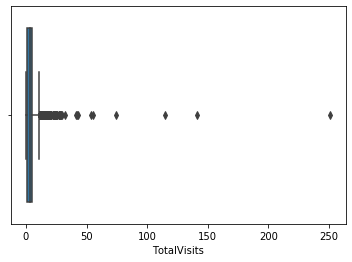

In [30]:
# PLOT TOTALVISITS
sns.boxplot(lead_data['TotalVisits'])
plt.show()

In [31]:
# CAPPING OUTLIERS AT 5-95 PERCENTILE

qn = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= qn[0]] = qn[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= qn[1]] = qn[1]

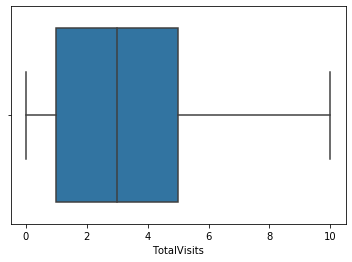

In [32]:
# AFTER CAPPING
sns.boxplot(lead_data['TotalVisits'])
plt.show()

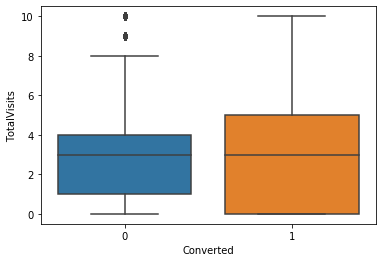

In [33]:
# PLot Converted wise Total Visits
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data)
plt.show()

#### Inference
Median for converted and not converted leads are the same. Nothng conclusive can be said on the basis of Total Visits.

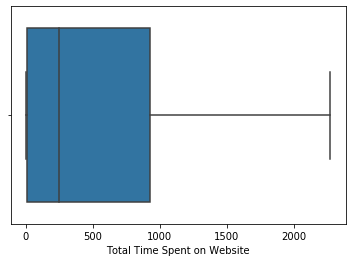

In [34]:
# Plot 
sns.boxplot(lead_data['Total Time Spent on Website'])
plt.show()


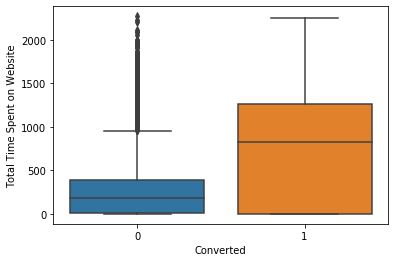

In [35]:
# PLot Converted wise Total Time Spent on Websites
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data)
plt.show()

#### Inference
Leads spending more time on the weblise are more likely to be converted. Website should be made more engaging to make leads spend more time.

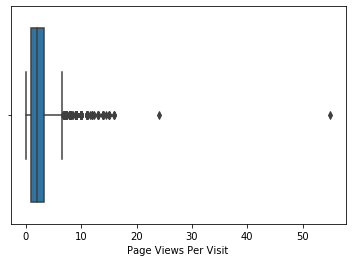

In [36]:
# Plot Page Views
sns.boxplot(lead_data['Page Views Per Visit'])

In [37]:
# Capping outliers

qn = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= qn[0]] = qn[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= qn[1]] = qn[1]

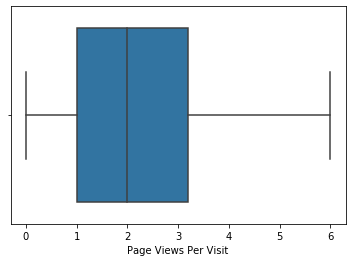

In [38]:
# After Capping

sns.boxplot(lead_data['Page Views Per Visit'])
plt.show()

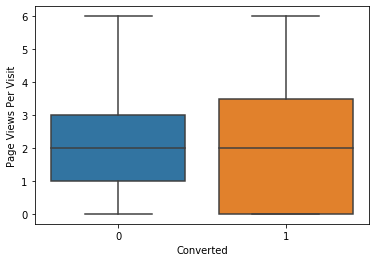

In [39]:
# Compare

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_data)
plt.show()

#### Inference
Median for converted and unconverted leads is the same. Nothing can be said specifically for lead conversion from Page Views Per Visit

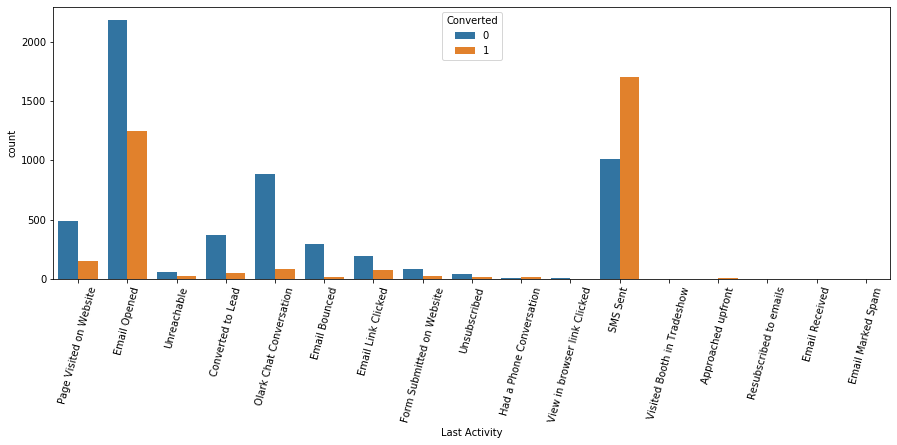

In [40]:
# Compare Last Activity

plt.figure(figsize=(15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
plt.xticks(rotation = 75)
plt.show()

In [41]:
# Groping Some very low value features to a single group

lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

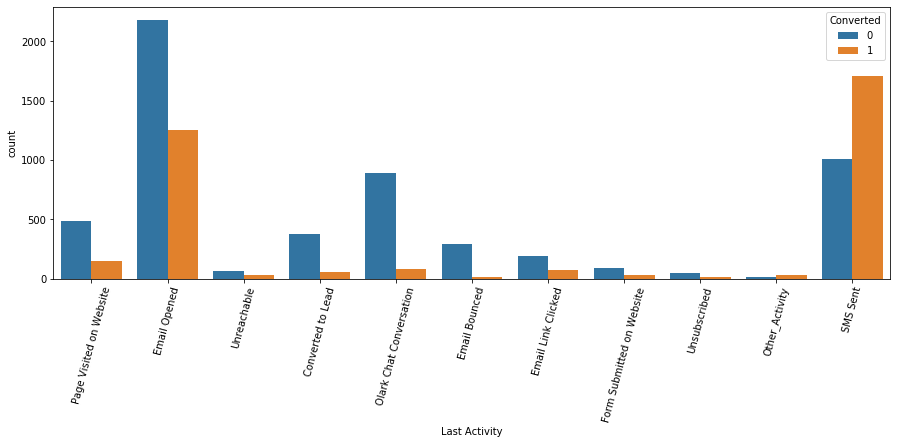

In [42]:
# After Grouping

plt.figure(figsize=(15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
plt.xticks(rotation = 75)
plt.show()

#### Inference
Most of the lead have their Email opened as their last activity. Conversion rate for leads with last activity as SMS Sent is almost 60%.

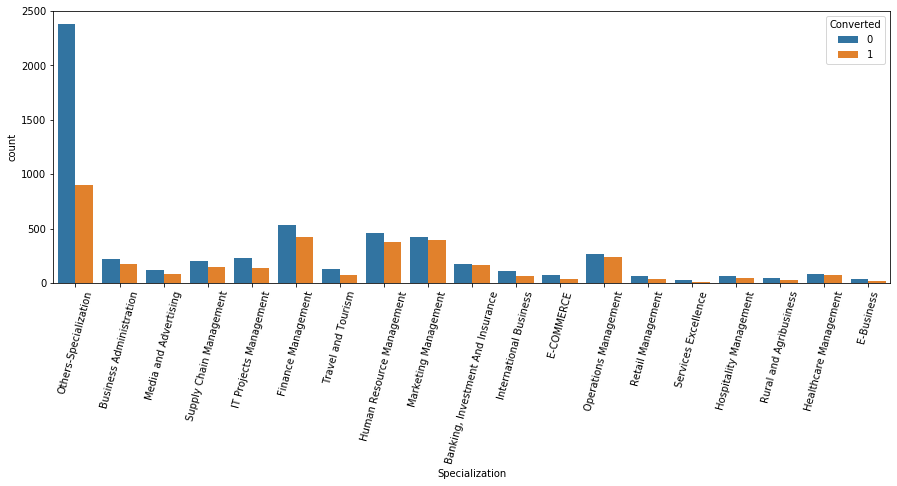

In [43]:
# Compare Specialization

plt.figure(figsize=(15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data)
plt.xticks(rotation = 75)
plt.show()

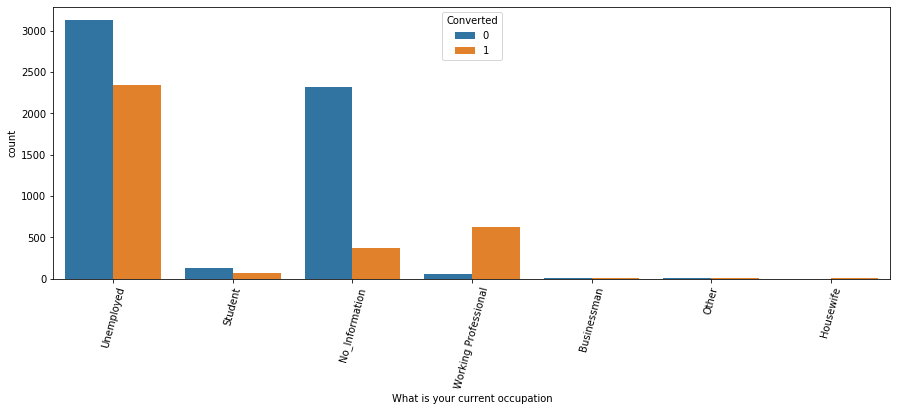

In [44]:
# Compare Current Occupation with Converted

plt.figure(figsize=(15,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data)
plt.xticks(rotation = 75)
plt.show()

#### Inference
Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in numbers but has around 30-35% conversion rate.

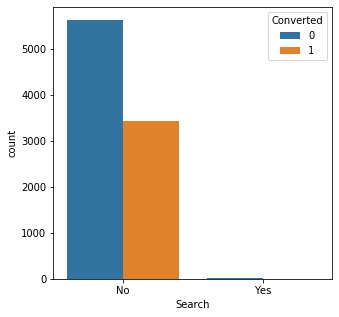

In [45]:
# Plot Search Variable

plt.figure(figsize=(5,5))
sns.countplot(x='Search', hue='Converted',data=lead_data)
plt.show()

#### Inference
Most of the responses are **No** but among those responses there is a high ration of conversion. So we cant ignore this fact.

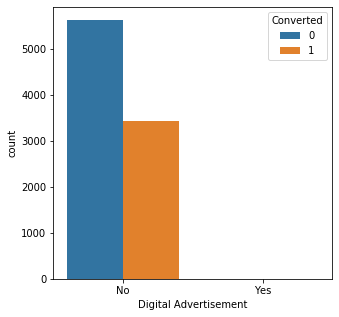

In [46]:
# Plot Digital Advertisement

plt.figure(figsize=(5,5))
sns.countplot(x='Digital Advertisement', hue='Converted',data=lead_data)
plt.show()

#### Inference
Most of the responses are **No** but among those responses there is a high ration of conversion. So we cant ignore this fact.

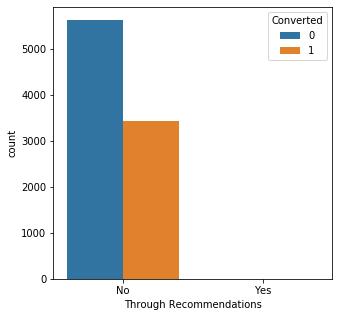

In [47]:
# Plot Through Recommendation Variable

plt.figure(figsize=(5,5))
sns.countplot(x='Through Recommendations', hue='Converted',data=lead_data)
plt.show()

#### Inference
Most of the responses are **No** but among those responses there is a high ration of conversion. So we cant ignore this fact.

In [48]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others-Specialization,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others-Specialization,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others-Specialization,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [49]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [50]:
# Dropping some variables which are not Significat for the model

lead_data = lead_data.drop(['Lead Number','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [51]:
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Digital Advertisement,Through Recommendations,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others-Specialization,Unemployed,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others-Specialization,Unemployed,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others-Specialization,Unemployed,No,No,No,Modified


In [52]:
lead_data.shape

(9074, 16)

In [53]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [54]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   int64  
 4   Do Not Call                      9074 non-null   int64  
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  Search              

In [55]:
# Creating a dummy variable for some of the categorical variables and dropping the first one

dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Search','Digital Advertisement','Through Recommendations','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_No_Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [56]:
# Concatinate dummy dataframe with lead_data

lead_data = pd.concat([lead_data, dummy], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Digital Advertisement,Through Recommendations,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_No_Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others-Specialization,Unemployed,No,No,No,Modified,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others-Specialization,Unemployed,No,No,No,Email Opened,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,Email Opened,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,Modified,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others-Specialization,Unemployed,No,No,No,Modified,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [57]:
# Dropping the main categorical variable for which we have create dummy

lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Search','Digital Advertisement','Through Recommendations','Last Notable Activity'], axis = 1)

In [58]:
lead_data.shape

(9074, 70)

In [59]:
# Dropping the prospect Id and Converted and adding the rest of variables to "X"

from sklearn.model_selection import train_test_split
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,...,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_No_Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [60]:
# Adding the target variable to "y"

y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [61]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [62]:
# Applying Scaler to numeric variable and fit & transform them

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,...,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_No_Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [63]:
# Checking the Convertion Rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

## Model Building
### Running First Training Model
#### First Model Before RFE

In [64]:
import statsmodels.api as sm

# First Logistic regression model before RFE

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6282
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2452.0
Date:                Sat, 05 Sep 2020   Deviance:                       4904.1
Time:                        12:21:51   Pearson chi2:                 6.11e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.5054   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -1.5642      0.228     -6.850      0.000      -2.012      -1.117
Do Not Call                                             22.4791   5.15e+04      0.000      1.000   -1.01e+05    1.01e+05
TotalVisits                                              0.3120      0.058      5.369      0.000       0.198       0.426
Total Time Spent on Website                              1.1178      0.042     26.360      0.000       1.035       1.201
Page Views Per Visit                                    -0.3324      0.065     -5.122      0.000      -0.460      -0.205
Lead Origin_Landing Page Submission                     -0.7947      0.140     -5.659      0.000      -1.070      -0.519
Lead Origin_Lead Add Form                                0.5739      1.009      0.569      0.569      -1.404       2.551
Lead Origin_Lead Import                                 23.6907   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Facebook                                   -22.6922   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                       0.3656      0.099      3.693      0.000       0.172       0.560
Lead Source_Olark Chat                                   1.4238      0.166      8.552      0.000       1.098       1.750
Lead Source_Organic Search                               0.1358      0.135      1.007      0.314      -0.128       0.400
Lead Source_Others                                       1.1389      0.656      1.735      0.083      -0.147       2.425
Lead Source_Reference                                    2.7330      1.033      2.646      0.008       0.709       4.757
Lead Source_Referral Sites                               0.0839      0.370      0.227      0.820      -0.641       0.809
Lead Source_Welingak Website                             5.1677      1.243      4.157      0.000       2.731       7.604
Last Activity_Email Bounced                             -0.1295      0.676     -0.192      0.848      -1.454       1.195
Last Activity_Email Link Clicked                         0.6771      0.437      1.550      0.121      -0.179       1.533
Last Activity_Email Opened                               1.0180      0.259      3.935      0.000       0.511       1.525
Last Activity_Form Submitted on Website                  0.4078      0.409      0.998      0.318      -0.393       1.209
Last Activity_Olark Chat Conversation                   -0.2984      0.292     -1.021      0.307      -0.871       0.275
Last Activity_Other_Activity                             2

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Applying RFE for best features selection

logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [66]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 40),
 ('Lead Source_Others', False, 25),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 50),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 29),
 ('Last Activity_Email Link Clicked', False, 21),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Form Submitted on Website', False, 37),
 ('Last Activity_Olark Chat Conversation', False, 9),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 20),
 ('Last Activity_SMS Sent', True, 1

In [67]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others-Specialization',
       'What is your current occupation_Housewife',
       'What is your current occupation_No_Information',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model 1

In [68]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.1
Date:                Sat, 05 Sep 2020   Deviance:                       5174.1
Time:                        12:22:48   Pearson chi2:                 6.34e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3421      0.123     -2.791      0.005      -0.582      -0.102
Do Not Email                                            -1.7562      0.189     -9.278      0.000      -2.127      -1.385
Total Time Spent on Website                              1.1162      0.041     27.264      0.000       1.036       1.196
Lead Origin_Landing Page Submission                     -0.9719      0.127     -7.660      0.000      -1.221      -0.723
Lead Origin_Lead Add Form                                3.1453      0.234     13.447      0.000       2.687       3.604
Lead Source_Olark Chat                                   1.1443      0.121      9.419      0.000       0.906       1.382
Lead Source_Welingak Website                             2.5436      0.756      3.364      0.001       1.062       4.026
Last Activity_Other_Activity                             1.9965      0.468      4.263      0.000       1.079       2.914
Last Activity_SMS Sent                                   1.4858      0.075     19.823      0.000       1.339       1.633
Last Activity_Unsubscribed                               1.5816      0.475      3.331      0.001       0.651       2.512
Specialization_Others-Specialization                    -1.0076      0.124     -8.121      0.000      -1.251      -0.764
What is your current occupation_Housewife               22.8006   1.53e+04      0.001      0.999      -3e+04       3e+04
What is your current occupation_No_Information          -1.2394      0.089    -13.976      0.000      -1.413      -1.066
What is your current occupation_Working Professional     2.3771      0.191     12.450      0.000       2.003       2.751
Last Notable Activity_Olark Chat Conversation           -0.7641      0.337     -2.270      0.023      -1.424      -0.104
Last Notable Activity_Unreachable                        2.1654      0.501      4.320      0.000       1.183       3.148
========================================================================================================================
"""

### Model 2

In [69]:
col1 = col.drop('What is your current occupation_Housewife',1)

In [70]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.4
Date:                Sat, 05 Sep 2020   Deviance:                       5182.8
Time:                        12:23:06   Pearson chi2:                 6.36e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3349      0.122     -2.736      0.006      -0.575      -0.095
Do Not Email                                            -1.7591      0.189     -9.294      0.000      -2.130      -1.388
Total Time Spent on Website                              1.1155      0.041     27.276      0.000       1.035       1.196
Lead Origin_Landing Page Submission                     -0.9719      0.127     -7.669      0.000      -1.220      -0.724
Lead Origin_Lead Add Form                                3.1600      0.234     13.526      0.000       2.702       3.618
Lead Source_Olark Chat                                   1.1428      0.121      9.410      0.000       0.905       1.381
Lead Source_Welingak Website                             2.5281      0.756      3.344      0.001       1.046       4.010
Last Activity_Other_Activity                             1.9917      0.468      4.253      0.000       1.074       2.910
Last Activity_SMS Sent                                   1.4809      0.075     19.768      0.000       1.334       1.628
Last Activity_Unsubscribed                               1.5793      0.475      3.326      0.001       0.649       2.510
Specialization_Others-Specialization                    -1.0122      0.124     -8.164      0.000      -1.255      -0.769
What is your current occupation_No_Information          -1.2417      0.089    -14.007      0.000      -1.415      -1.068
What is your current occupation_Working Professional     2.3717      0.191     12.422      0.000       1.997       2.746
Last Notable Activity_Olark Chat Conversation           -0.7658      0.337     -2.274      0.023      -1.426      -0.106
Last Notable Activity_Unreachable                        2.1607      0.501      4.310      0.000       1.178       3.143
========================================================================================================================
"""

Now all features are looking quite good. The P-Value is also in a acceptable range.

In [71]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.061378
1012    0.090390
9226    0.570838
4750    0.682523
7987    0.918687
1281    0.767930
2880    0.028424
4971    0.963374
7536    0.851967
1248    0.904356
dtype: float64

In [72]:
# Reshaping the values

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06137786, 0.09038965, 0.57083787, 0.68252312, 0.91868727,
       0.76792996, 0.02842379, 0.96337353, 0.8519668 , 0.9043556 ])

#### Creating a dataframe with the actual convertion and the predicted probabilities

In [73]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.061378,3009
1,0,0.090390,1012
2,0,0.570838,9226
3,1,0.682523,4750
4,1,0.918687,7987


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [74]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.061378,3009,0
1,0,0.090390,1012,0
2,0,0.570838,9226,1
3,1,0.682523,4750,1
4,1,0.918687,7987,1


In [75]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3455  450]
 [ 729 1717]]


In [76]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8143599433160132


### Checking VIF

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others-Specialization,2.11
4,Lead Source_Olark Chat,1.92
2,Lead Origin_Landing Page Submission,1.64
3,Lead Origin_Lead Add Form,1.60
10,What is your current occupation_No_Information,1.60
7,Last Activity_SMS Sent,1.52
5,Lead Source_Welingak Website,1.37
1,Total Time Spent on Website,1.30
11,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.18


 So Now all VIF value are good. So we need not to drop any variable further and we can proceed for making prediction using this model as our **Final Model**.

In [82]:
x_train = pd.DataFrame(X_train[col1])
x_train.shape

(6351, 14)

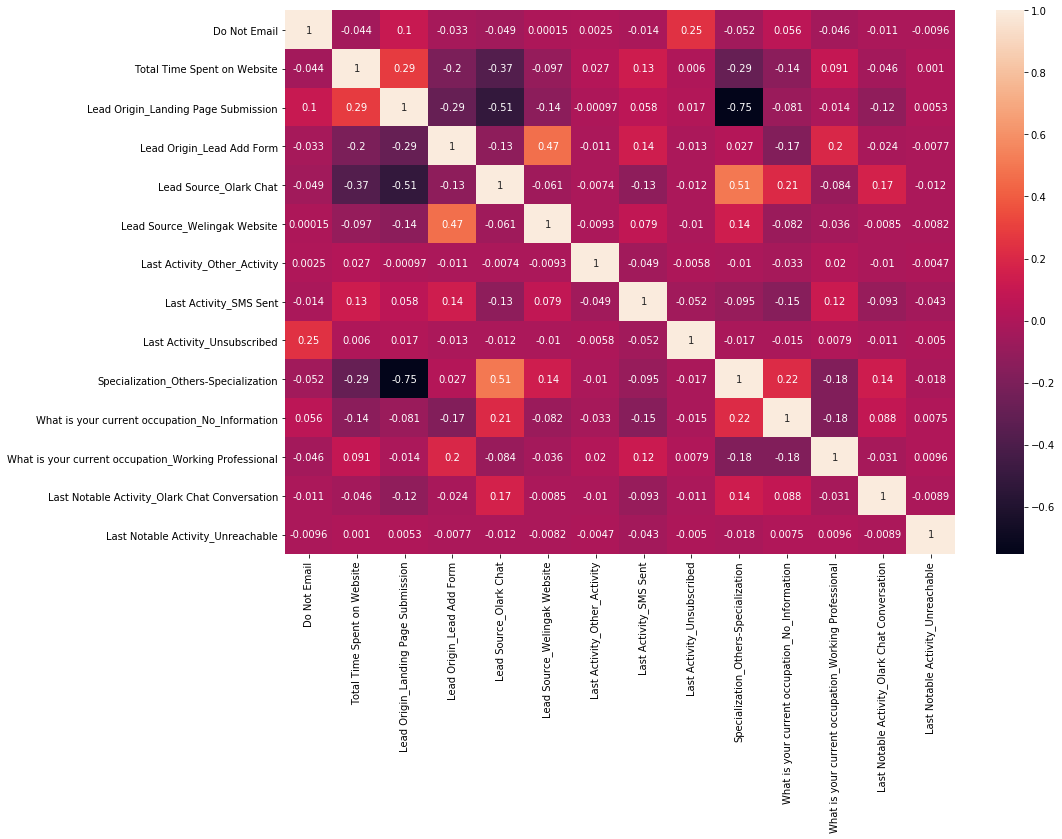

In [84]:
plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr(), annot=True)
plt.show()

#### Metrics beyond simply accurac

In [85]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7019623875715454

In [87]:
# Let see calculate specificity
TN / float(TN+FP)

0.8847631241997439

In [88]:
# Calculate false postive rate - predicting convertion when customer does not have converted
print(FP/ float(TN+FP))

0.11523687580025609


In [89]:
# positive predictive value 
print (TP / float(TP+FP))

0.792339640055376


In [90]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8257648183556405


##### Step 9: Plotting the ROC Curve

In [91]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

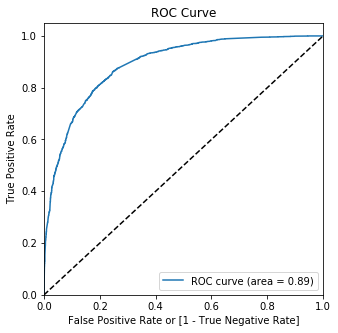

In [93]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [94]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.061378,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.090390,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.570838,9226,1,1,1,1,1,1,1,0,0,0,0
3,1,0.682523,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.918687,7987,1,1,1,1,1,1,1,1,1,1,1


In [95]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.627618  0.979150  0.407426
0.2   0.2  0.753267  0.921504  0.647887
0.3   0.3  0.796725  0.840556  0.769270
0.4   0.4  0.809636  0.773508  0.832266
0.5   0.5  0.814360  0.701962  0.884763
0.6   0.6  0.798142  0.600572  0.921895
0.7   0.7  0.782869  0.522486  0.945967
0.8   0.8  0.760983  0.430908  0.967734
0.9   0.9  0.716895  0.286999  0.986172


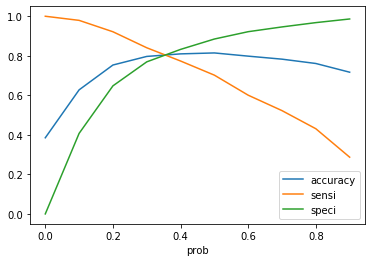

In [96]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [97]:
# From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.061378,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.090390,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.570838,9226,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.682523,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.918687,7987,1,1,1,1,1,1,1,1,1,1,1,1


### Assigning Lead Score

In [98]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.061378,3009,0,1,0,0,0,0,0,0,0,0,0,0,6
1,0,0.090390,1012,0,1,0,0,0,0,0,0,0,0,0,0,9
2,0,0.570838,9226,1,1,1,1,1,1,1,0,0,0,0,1,57
3,1,0.682523,4750,1,1,1,1,1,1,1,1,0,0,0,1,68
4,1,0.918687,7987,1,1,1,1,1,1,1,1,1,1,1,1,92


In [99]:
# Assigning Lead Type based on atbitrary cutoff

y_train_pred_final['Lead_type'] = y_train_pred_final.Lead_Score.map(lambda x:'Hot Lead' if x>=80 else 'Cold Lead')

In [100]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score,Lead_type
0,0,0.061378,3009,0,1,0,0,0,0,0,0,0,0,0,0,6,Cold Lead
1,0,0.090390,1012,0,1,0,0,0,0,0,0,0,0,0,0,9,Cold Lead
2,0,0.570838,9226,1,1,1,1,1,1,1,0,0,0,0,1,57,Cold Lead
3,1,0.682523,4750,1,1,1,1,1,1,1,1,0,0,0,1,68,Cold Lead
4,1,0.918687,7987,1,1,1,1,1,1,1,1,1,1,1,1,92,Hot Lead


In [101]:
# Sorting value based on lead Score

y_train_pred_final.sort_values(by='Lead_Score', ascending= False)

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score,Lead_type
3399,1,0.996619,2764,1,1,1,1,1,1,1,1,1,1,1,1,100,Hot Lead
132,1,0.996619,2675,1,1,1,1,1,1,1,1,1,1,1,1,100,Hot Lead
2254,1,0.996022,161,1,1,1,1,1,1,1,1,1,1,1,1,100,Hot Lead
3389,1,0.995726,1552,1,1,1,1,1,1,1,1,1,1,1,1,100,Hot Lead
5434,1,0.996619,2677,1,1,1,1,1,1,1,1,1,1,1,1,100,Hot Lead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,0,0.003716,8252,0,1,0,0,0,0,0,0,0,0,0,0,0,Cold Lead
2279,0,0.002549,8733,0,1,0,0,0,0,0,0,0,0,0,0,0,Cold Lead
4380,0,0.002699,5279,0,1,0,0,0,0,0,0,0,0,0,0,0,Cold Lead
4116,0,0.002020,9173,0,1,0,0,0,0,0,0,0,0,0,0,0,Cold Lead


In [141]:
conversion_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
conversion_df['final_predicted'].value_counts()

1    1933
0     513
Name: final_predicted, dtype: int64

In [142]:
# Checking Conversion Rate on Final Prediction
1933/float(1933+513)

0.7902698282910875

In [102]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8096362777515352

In [103]:
# Lets again check confusion matrix after getting optimal cutoff point

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3209,  696],
       [ 513, 1933]], dtype=int64)

In [104]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [105]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7902698282910875

In [106]:
# Let us calculate specificity
TN / float(TN+FP)

0.8217669654289372

In [107]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.17823303457106274


In [108]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7352605553442374


In [109]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8621708758731864


#### Precision & Recall

In [110]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.792339640055376

In [111]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7019623875715454

#### Precision & Recall Tradeoff

In [112]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [113]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

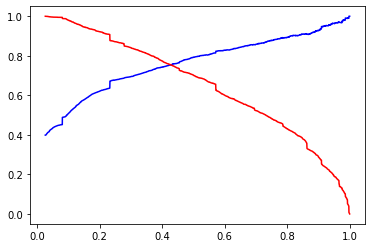

In [114]:
# Optimal plot

plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Prediction On Test set

In [115]:
# Transforming Test set on the same variable

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,...,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_No_Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,0.284772,-0.600595,0.955505,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.643547,1.887326,1.510766,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,0,0,-0.432779,-0.752879,-0.155018,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,0,0,-1.150329,-0.888650,-1.265540,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,1.719873,-0.587751,2.066027,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [117]:
# Evaluating final model based on final model

X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Others-Specialization,What is your current occupation_No_Information,What is your current occupation_Working Professional,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
3271,0,-0.600595,0,0,0,0,0,0,0,1,1,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,0,1,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,1,0,0,0
4216,0,-0.888650,0,1,0,0,0,0,0,0,0,0,0,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,1,0,0,0


In [118]:
X_test_sm = sm.add_constant(X_test)

In [119]:
# Lets check prediction

y_test_pred = res.predict(X_test_sm)

In [120]:
y_test_pred[:10]

3271    0.037010
1490    0.959693
7936    0.031410
4216    0.862207
3830    0.039007
1800    0.557021
6507    0.365118
4821    0.288571
4223    0.909079
4714    0.277586
dtype: float64

In [121]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.037010
1490,0.959693
7936,0.031410
4216,0.862207
3830,0.039007


In [122]:
y_test_df = pd.DataFrame(y_test)

In [123]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [124]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [125]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [126]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.037010
1,1,1490,0.959693
2,0,7936,0.031410
3,1,4216,0.862207
4,0,3830,0.039007


In [127]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.037010
1,1,1490,0.959693
2,0,7936,0.031410
3,1,4216,0.862207
4,0,3830,0.039007


In [128]:
# Obtaining final prediction based on optimal cutoff point

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map( lambda x: 1 if x > 0.38 else 0)

y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.037010,0
1,1,1490,0.959693,1
2,0,7936,0.031410,0
3,1,4216,0.862207,1
4,0,3830,0.039007,0


In [129]:
# Assigning Lead Score also for Test set

y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted,Lead_Score
0,0,3271,0.037010,0,4
1,1,1490,0.959693,1,96
2,0,7936,0.031410,0,3
3,1,4216,0.862207,1,86
4,0,3830,0.039007,0,4


In [130]:
# Assigning Lead Type also for Test set

y_pred_final['Lead_Type'] = y_pred_final.Lead_Score.map(lambda x: 'Hot Lead' if x >=80 else 'Cold Lead')
y_pred_final.sort_values(by='Lead_Score', ascending = False)

,Converted,Prospect ID,Converted_prob,final_predicted,Lead_Score,Lead_Type
2310,1,3723,0.996619,1,100,Hot Lead
1055,1,2674,0.996619,1,100,Hot Lead
2510,1,2673,0.996619,1,100,Hot Lead
23,1,5822,0.996619,1,100,Hot Lead
25,1,2684,0.996619,1,100,Hot Lead
...,...,...,...,...,...,...
2074,0,7904,0.008522,0,1,Cold Lead
918,0,6677,0.014826,0,1,Cold Lead
548,0,3544,0.010193,0,1,Cold Lead
1753,0,3682,0.002113,0,0,Cold Lead


In [143]:
conversion_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
conversion_df['final_predicted'].value_counts()

1    782
0    207
Name: final_predicted, dtype: int64

In [144]:
# Checking Convertion Percentage on test set
782/float(782+207)

0.7906976744186046

In [131]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8123393316195373

In [132]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1430,  304],
       [ 207,  782]], dtype=int64)

In [133]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [134]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7906976744186046

In [135]:
# Let us calculate specificity
TN / float(TN+FP)

0.8246828143021915

In [136]:
# Precision Score

from sklearn.metrics import precision_score, recall_score
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7200736648250461

In [137]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7906976744186046

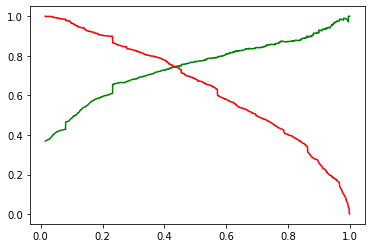

In [138]:
# Plot Thresholds

p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Conclusion:

So we can say that our best fitted line for our final model is

$ 1.75 \times Do Not Email + 1.115 \times Total Time Spent On Websites - 0.97 \times Lead Origin_ Landing Page Submission + 3.16 \times Lead Origin_Lead Add Form + 1.14 \times Lead Source_Olark Chat + 2.528 \times Lead Source_Welingak Website + 1.99 \times Lead Activity_Other Activity + 1.48 \times SMS Sent + 1.579 \times Unsubscibed - 1.01 \times Specialization_Other Specialization - 1.24 \times What is your current Occupation_No_Information + 2.37 \times what is your current occupation working_professional - 0.76 \times Last Notebale Activity Olak_Chat_Conversation + 2.16 \times Last Notebable Activity_Unreachable $

- **Based on our final model we have got an accuracy on prediction (by taking a arbitrary cutoff points at 0.5) is arround 81.43%.Sensityvity, Specificity and FPR is respectivly are 70.19%. 88.47% and 11.52% on train set.**


- **For ROC curve, the area under ROC curve is likely 0.89**


- **Then we again checked for sensitivity, specificity, accuracy, precision & Recall matrix based on the optimal cutoff points on train set and here we have got the value of Sensitivity, Specificity, Accuracy & FPR are respectively - 79%, 82%, 81% & 17%.**


- **These above values is quite similar for the Test Set when we evaluate the it on our Test set.**


- **Also we have checked the conversion Rate on the final model after assigning the lead Score and what we have got the value is arround 80%. During evaluation on Test Set we have seen almost a similar conversion Rate on Test Set also.**


- **So considering the above observation we can say that the overall model performance seems quite good.**
